<a href="https://colab.research.google.com/github/DianaDoosti/Introduction_to_AI_2025/blob/main/AI4032_MP1/Question_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
!pip install kagglehub
import kagglehub
from kagglehub import KaggleDatasetAdapter
path = kagglehub.dataset_download("yasserh/titanic-dataset")
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


In [44]:
import os
for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))



/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [45]:
import pandas as pd

df = pd.read_csv("/root/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1/Titanic-Dataset.csv")


print(df.info())

print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

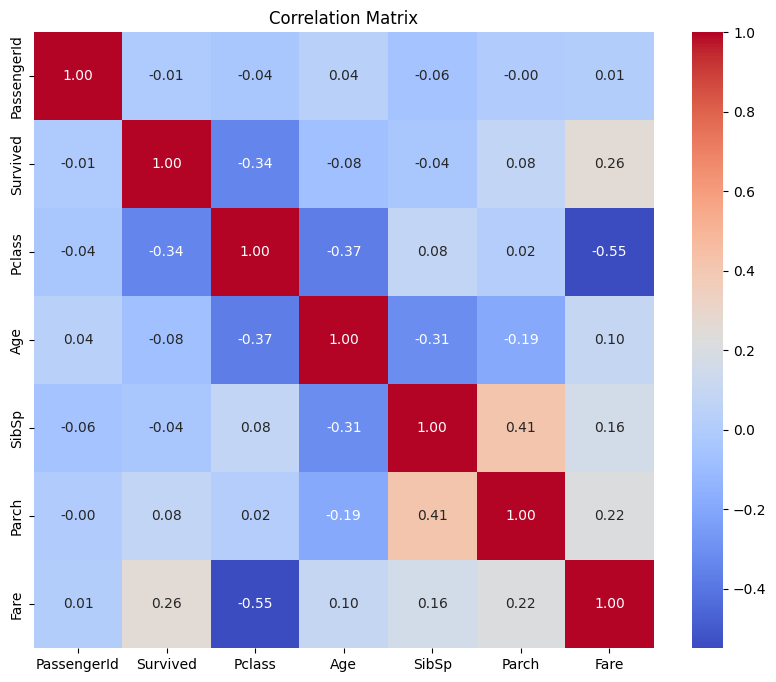

Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


In [46]:
#correleation

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

survived_corr = correlation_matrix['Survived'].drop('Survived').sort_values(ascending=False)
print(survived_corr)

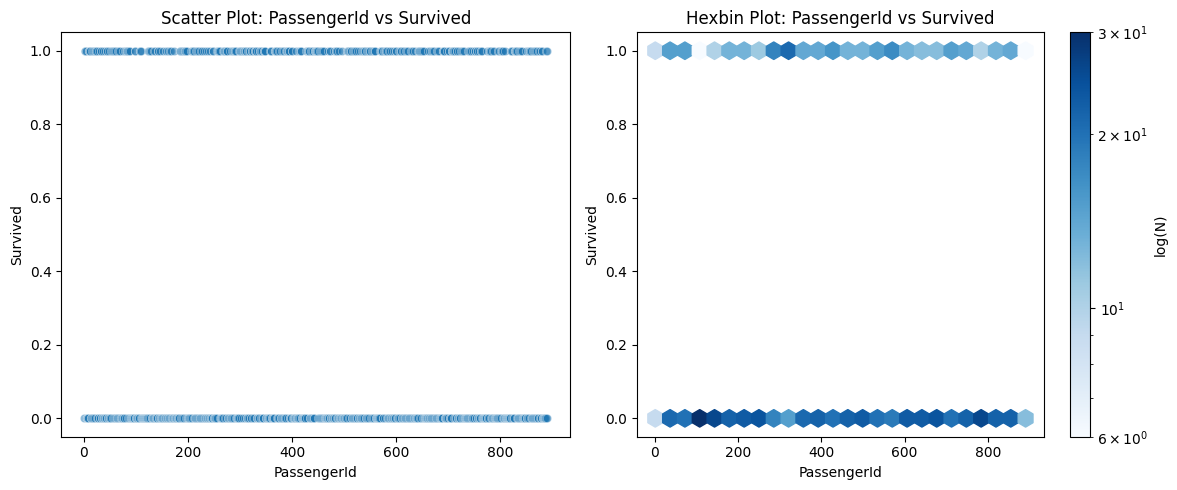

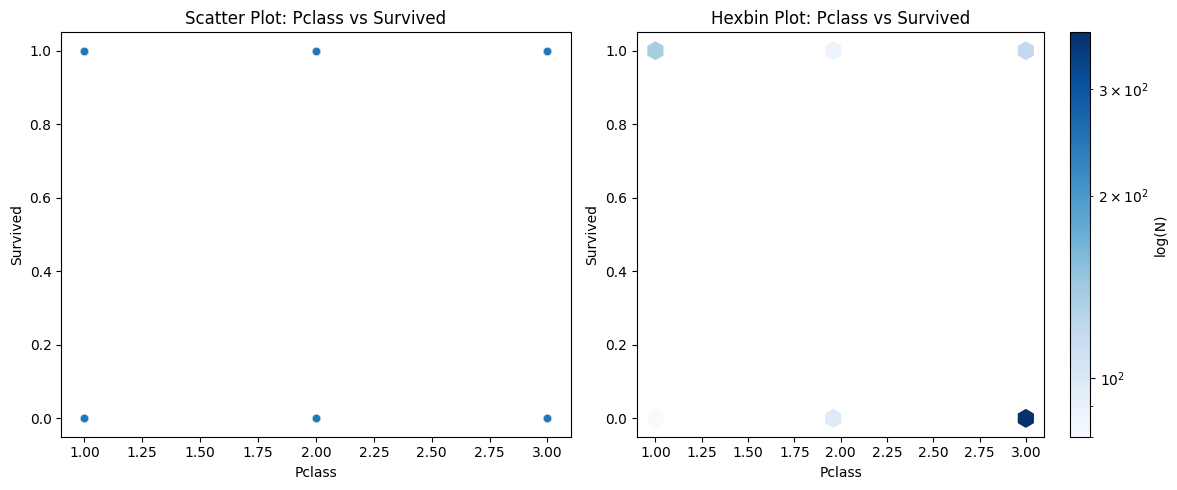

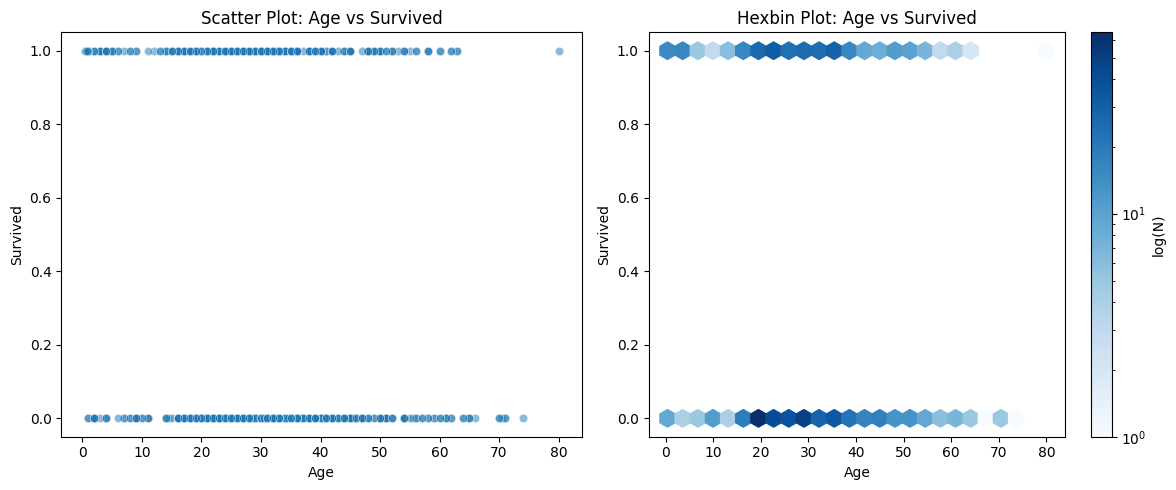

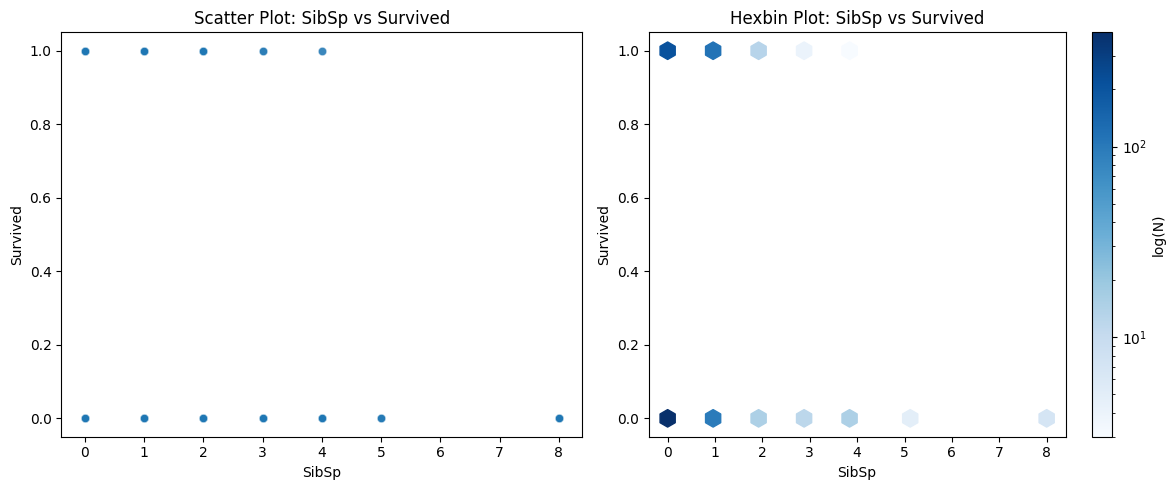

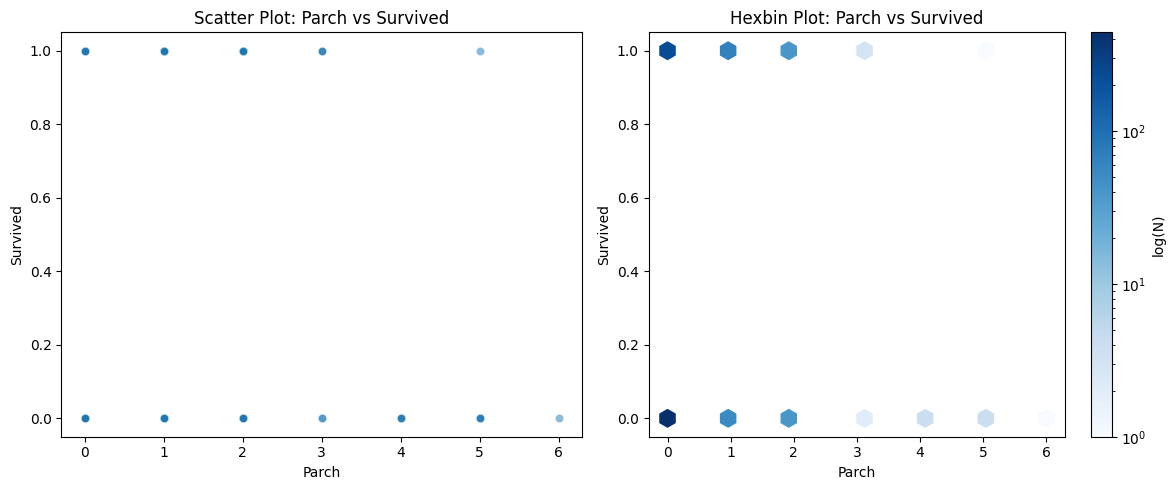

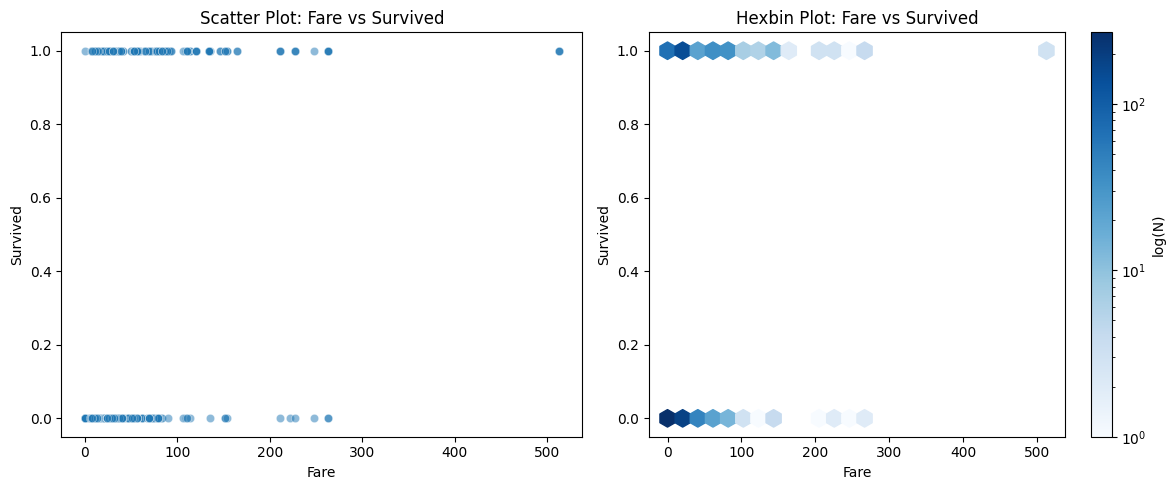

In [47]:
import matplotlib.pyplot as plt

numeric_features = df.select_dtypes(include=['number']).columns.tolist()

# رسم نمودارهای پراکندگی و هگزبین نسبت به Survived
for feature in numeric_features:
    if feature != 'Survived':
        plt.figure(figsize=(12, 5))

        # Scatter plot
        plt.subplot(1, 2, 1)
        sns.scatterplot(data=df, x=feature, y='Survived', alpha=0.5)
        plt.title(f'Scatter Plot: {feature} vs Survived')

        # Hexbin plot
        plt.subplot(1, 2, 2)
        plt.hexbin(df[feature], df['Survived'], gridsize=25, cmap='Blues', bins='log')
        plt.colorbar(label='log(N)')
        plt.xlabel(feature)
        plt.ylabel('Survived')
        plt.title(f'Hexbin Plot: {feature} vs Survived')

        plt.tight_layout()
        plt.show()

In [48]:
import plotly.express as px

df_clean = df.dropna(subset=['Age', 'Fare'])

fig = px.scatter(
    df_clean,
    x='Age',
    y='Fare',
    color='Survived',
    title='survival distribution-age/fair',
    labels={'Age': '(Age)','Fare': '(Fare)', 'Survived': 'survived(1=survived,0=dead) )'
    },
    opacity=0.7
)

fig.show()

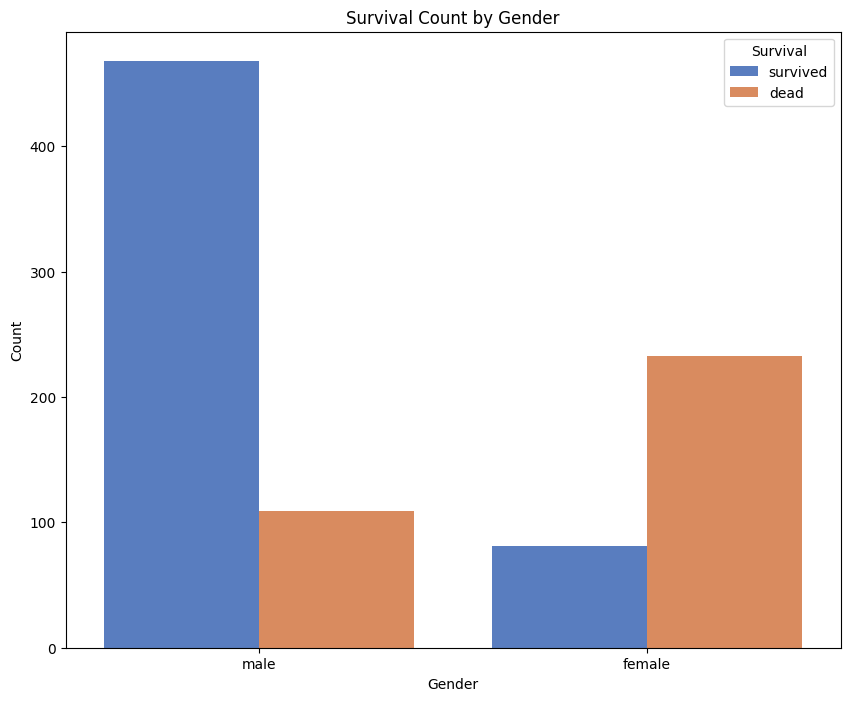

Survived      0      1
Sex                   
female     8100  23300
male      46800  10900


In [49]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x="Sex", hue="Survived", palette="muted")
plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Survival", labels=["survived", "dead"])
plt.show()
survival_gender = df.groupby("Sex")["Survived"].value_counts(normalize=False).unstack() * 100
print(survival_gender)


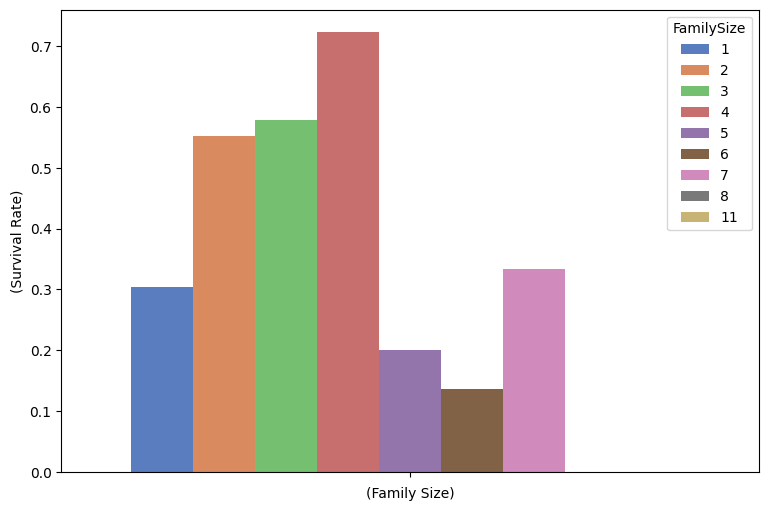

In [50]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

plt.figure(figsize=(9, 6))
sns.barplot(data=df, hue='FamilySize', y='Survived', errorbar=None, palette='muted')
plt.xlabel('(Family Size)')
plt.ylabel('(Survival Rate)')
plt.show()


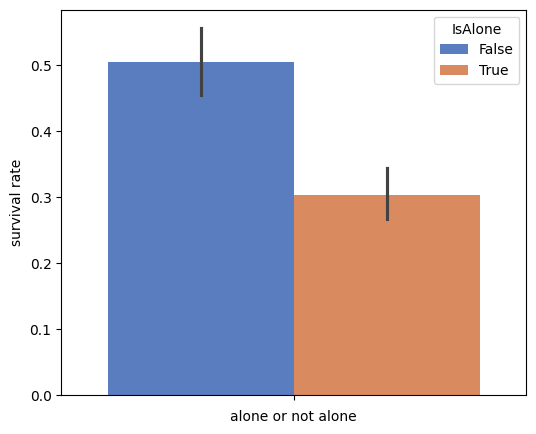

In [51]:
df['IsAlone'] = df['FamilySize'] == 1

survival_by_alone = df.groupby('IsAlone')['Survived'].mean()

plt.figure(figsize=(6, 5))
sns.barplot(data=df, hue='IsAlone', y='Survived', palette='muted')
plt.xlabel('alone or not alone')
plt.ylabel('survival rate')
plt.show()

<ipython-input-52-b550a8a8a453>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



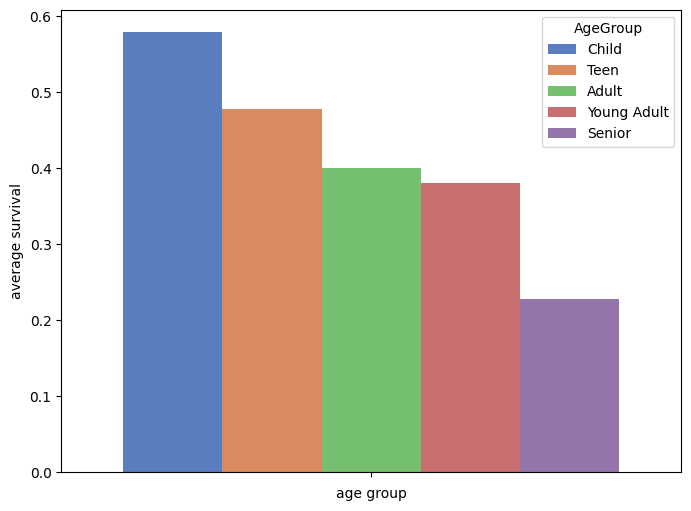

In [52]:
df = df[df['Age'].notnull()]

def age_group(age):
    if age <= 12:
        return 'Child'
    elif age <= 17:
        return 'Teen'
    elif age <= 35:
        return 'Young Adult'
    elif age <= 60:
        return 'Adult'
    else:
        return 'Senior'

df['AgeGroup'] = df['Age'].apply(age_group)

agegroup_survival = df.groupby('AgeGroup')['Survived'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(hue=agegroup_survival.index, y=agegroup_survival.values, palette='muted')
plt.xlabel('age group')
plt.ylabel('average survival')
plt.show()

In [53]:
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

missing_info = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
print(missing_info)

             Missing Values  Percentage
PassengerId               0    0.000000
Survived                  0    0.000000
Pclass                    0    0.000000
Name                      0    0.000000
Sex                       0    0.000000
Age                       0    0.000000
SibSp                     0    0.000000
Parch                     0    0.000000
Ticket                    0    0.000000
Fare                      0    0.000000
Cabin                   529   74.089636
Embarked                  2    0.280112
FamilySize                0    0.000000
IsAlone                   0    0.000000
AgeGroup                  0    0.000000


In [54]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [55]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [56]:
df_mode = df.copy()
df_mode["Embarked"] = df_mode["Embarked"].fillna(df_mode["Embarked"].mode()[0])
print(df_mode["Embarked"].isnull().sum())

0


In [57]:
df_reduced = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
print("Before:", df.shape)
print("After:", df_reduced.shape)


Before: (714, 15)
After: (714, 11)


In [58]:
numeric_features = df.select_dtypes(include=["int64", "float64"]).columns
print("Numeric Features:")
print(numeric_features.tolist())


Numeric Features:
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']


In [59]:
df_processed = df.copy()
df_processed = df_processed.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
df_processed = df_processed.dropna(subset=["Age", "Embarked"])
df_processed = pd.get_dummies(df_processed, columns=["Sex", "Embarked"], drop_first=True)
print(df_processed.head())


   Survived  Pclass   Age  SibSp  Parch     Fare  FamilySize  IsAlone  \
0         0       3  22.0      1      0   7.2500           2    False   
1         1       1  38.0      1      0  71.2833           2    False   
2         1       3  26.0      0      0   7.9250           1     True   
3         1       1  35.0      1      0  53.1000           2    False   
4         0       3  35.0      0      0   8.0500           1     True   

      AgeGroup  Sex_male  Embarked_Q  Embarked_S  
0  Young Adult      True       False        True  
1        Adult     False       False       False  
2  Young Adult     False       False        True  
3  Young Adult     False       False        True  
4  Young Adult      True       False        True  


In [60]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = df_processed.copy()
df_normalized[["Age", "Fare"]] = scaler.fit_transform(df_normalized[["Age", "Fare"]])
print(df_normalized[["Age", "Fare"]])


          Age      Fare
0    0.271174  0.014151
1    0.472229  0.139136
2    0.321438  0.015469
3    0.434531  0.103644
4    0.434531  0.015713
..        ...       ...
885  0.484795  0.056848
886  0.334004  0.025374
887  0.233476  0.058556
889  0.321438  0.058556
890  0.396833  0.015127

[712 rows x 2 columns]


In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df_processed.copy()
df_scaled[["Age", "Fare"]] = scaler.fit_transform(df_scaled[["Age", "Fare"]])
print(df_scaled[["Age", "Fare"]].head())


        Age      Fare
0 -0.527669 -0.516380
1  0.577094  0.694046
2 -0.251478 -0.503620
3  0.369951  0.350326
4  0.369951 -0.501257


In [62]:
from sklearn.linear_model import LassoCV
import pandas as pd

df_processed = pd.get_dummies(df_processed, drop_first=True)
X = df_processed.drop(columns=["Survived"])
y = df_processed["Survived"]


lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X, y)

# استخراج ویژگی‌های انتخاب شده
lasso_selected = X.columns[(lasso.coef_ != 0)].tolist()

print("Lasso selected features:")
print(lasso_selected)

Lasso selected features:
['Pclass', 'Age', 'SibSp', 'Fare', 'FamilySize', 'IsAlone', 'Sex_male', 'Embarked_S', 'AgeGroup_Child', 'AgeGroup_Young Adult']


In [63]:
logreg = LogisticRegression(max_iter=1000)
rfe = RFE(logreg, n_features_to_select=5)
rfe.fit(X, y)
rfe_selected = X.columns[rfe.support_].tolist()
print(" RFE:")
print(rfe_selected)


 RFE:
['Pclass', 'Sex_male', 'AgeGroup_Child', 'AgeGroup_Senior', 'AgeGroup_Teen']


In [64]:
selected_features = list(set(lasso_selected).union(set(rfe_selected)))


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
X = df_processed[selected_features]
y = df_processed["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [66]:
train_acc = accuracy_score(y_train, y_train_pred)*100
test_acc = accuracy_score(y_test, y_test_pred)*100

print(f"Train Accuracy: {train_acc:%}")
print(f"Test Accuracy: {test_acc:%}")

Train Accuracy: 8119.507909%
Test Accuracy: 8041.958042%


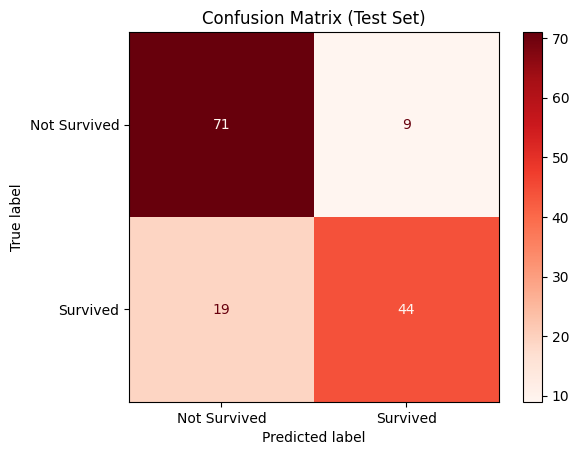

In [67]:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Survived", "Survived"])
disp.plot(cmap="Reds")
plt.title("Confusion Matrix (Test Set)")
plt.show()

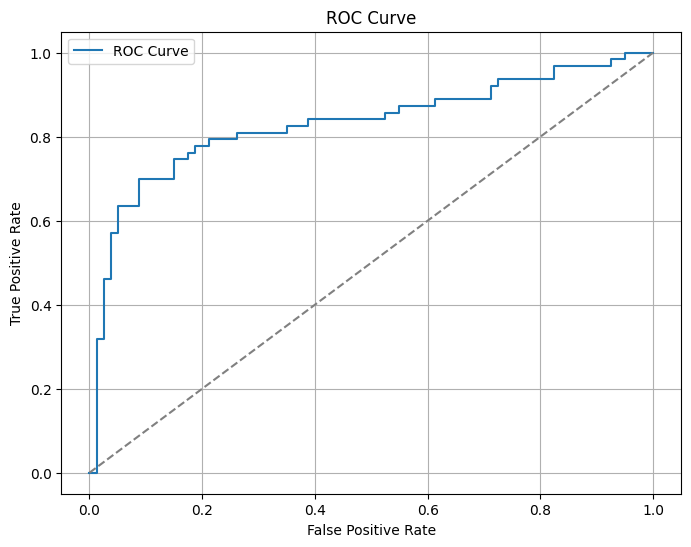

AUC: 0.8306


In [68]:
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()
auc = roc_auc_score(y_test, y_scores)
print(f"AUC: {auc:.4f}")

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

X = df_processed[selected_features]
y_binary = df_processed["Survived"]

X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_binary, test_size=0.2, random_state=42)

model_bin = LogisticRegression(max_iter=1000)
model_bin.fit(X_train, y_train_bin)

y_train_proba = model_bin.predict_proba(X_train)[:, 1]
y_test_proba = model_bin.predict_proba(X_test)[:, 1]

def categorize_chance(prob):
    if prob < 0.33:
        return 0  # شانس پایین
    elif prob < 0.66:
        return 1  # شانس متوسط
    else:
        return 2  # شانس بالا

y_train_multi = np.array([categorize_chance(p) for p in y_train_proba])
y_test_multi = np.array([categorize_chance(p) for p in y_test_proba])

unique, counts = np.unique(y_train_multi, return_counts=True)
print("تعداد نمونه در هر کلاس (مجموعه آموزش):")
for label, count in zip(unique, counts):
    print(f"کلاس {label}: {count}")

تعداد نمونه در هر کلاس (مجموعه آموزش):
کلاس 0: 292
کلاس 1: 138
کلاس 2: 139


In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

multi_model = LogisticRegression(solver='lbfgs', max_iter=2000)  # افزایش max_iter
multi_model.fit(X_train_scaled, y_train_multi)

y_pred_multi = multi_model.predict(X_test_scaled)

acc_multi = accuracy_score(y_test_multi, y_pred_multi)
print(f"Model Accuracy Multinomial: {acc_multi:.4f}")

Model Accuracy Multinomial: 0.9650


In [71]:
feature_names = X.columns
coefficients = model.coef_[0]
df_coefs = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients,
    "Odds Ratio": np.exp(coefficients)
})
df_coefs = df_coefs.sort_values(by="Odds Ratio", ascending=False)
print(df_coefs)


                 Feature  Coefficient  Odds Ratio
2         AgeGroup_Child     1.451446    4.269284
11         AgeGroup_Teen     0.075607    1.078539
10  AgeGroup_Young Adult     0.009369    1.009413
7                   Fare     0.000661    1.000662
1                    Age    -0.018936    0.981243
8             Embarked_S    -0.080831    0.922350
4             FamilySize    -0.235884    0.789873
5        AgeGroup_Senior    -0.354879    0.701258
3                  SibSp    -0.449365    0.638033
0                IsAlone    -0.726933    0.483389
6                 Pclass    -1.180942    0.306989
9               Sex_male    -2.580982    0.075700
